In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# extract data from zip file
import zipfile
import os

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/drive/MyDrive/465 Project/new_archive.zip'
extract_folder_path = '/content/data'

os.makedirs(extract_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [7]:
# lib imports
import torch
import os
import numpy as np
import pandas as pd
import random
import cv2

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [8]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
IMG_COUNT = 480

In [9]:
# set this between [1, 10] for differently composed datasets
# reference: https://arxiv.org/pdf/2307.05911.pdf
TRAINING_SET = 6

# 10 Different training sets as mentioned in original paper

In [10]:
#@title This cell is for composing the datasets as mentioned in the original paper

# Set the target image size
target_size = (IMG_WIDTH, IMG_HEIGHT)

# Create empty lists to hold the images and masks
images = []
masks = []

image_dir_ms = '/content/data/GRAIN DATA SET/RG'
mask_dir_ms = '/content/data/GRAIN DATA SET/RGMask'
# vt stands for voronoi tessellation
image_dir_vt = '/content/data/GRAIN DATA SET/AG'
mask_dir_vt = '/content/data/GRAIN DATA SET/AGMask'

image_dir_hed = '/content/data/GRAIN DATA SET/HED_PRE'
mask_dir_hed = '/content/data/GRAIN DATA SET/RGMask'

image_dir_grad = '/content/data/GRAIN DATA SET/GRAD_PRE'
mask_dir_grad = '/content/data/GRAIN DATA SET/RGMask'

image_dir_thresh = '/content/data/GRAIN DATA SET/THRESH_PRE'
mask_dir_thresh = '/content/data/GRAIN DATA SET/RGMask'

if TRAINING_SET==1:
    # 100% Manually Segmented
    print("Selected Training Set 1")
    print("Manually Segmented - 100% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==2:
    # 25% Artificial, 75% Manually Segmented (160, 480)
    print("Selected Training Set 2")
    print("Voronoi Tessellation - 25% (160)")
    print("Manually Segmented - 75% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==160:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==160:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==3:
    # 50% Artificial, 50% Manually Segmented (480, 480)
    print("Selected Training Set 3")
    print("Voronoi Tessellation - 50% (480)")
    print("Manually Segmented - 50% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==4:
    # 75% Artificial, 25% Manually Segmented (800, 266)
    print("Selected Training Set 4")
    print("Voronoi Tessellation - 75% (800)")
    print("Manually Segmented - 25% (266)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==266:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==266:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==5:
    # 100% Artificial (800)
    print("Selected Training Set 5")
    print("Voronoi Tessellation - 100% (800)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==6:
    # 50% HED Preprocessed, 50% Manually Segmented (240, 240)
    print("Selected Training Set 6")
    print("HED Preprocessed - 50% (240)")
    print("Manually Segmented - 50% (240)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==7:
    # 50% Manually Segmented, 25% Artificial, 25% HED Preprocessed(240, 120, 120)
    print("Selected Training Set 7")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("HED Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


elif TRAINING_SET==8:
    # 50% Manually Segmented, 25% Artificial, 25% GRAD Preprocessed(240, 120, 120)
    print("Selected Training Set 8")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("GRAD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==9:
    # 50% Manually Segmented, 25% Artificial, 25% THRESHOLD Preprocessed(240, 120, 120)
    print("Selected Training Set 9")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("THRESHOLD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==10:
    # 50% Manually Segmented, 16.67% HED Prep., 16.67% GRAD Prep.,16.67% THRESHOLD Prep.(240, 80, 80, 80)
    print("Selected Training Set 10")
    print("Manually Segmented - 50% (240)")
    print("HED Preprocessed - 16.67% (80)")
    print("GRAD Preprocessed - 16.67% (80)")
    print("THRESHOLD Preprocessed - 16.67% (80)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1



IMG_COUNT = len(images)
print(f"image count : {IMG_COUNT}")

Selected Training Set 6
HED Preprocessed - 50% (240)
Manually Segmented - 50% (240)
image count : 480


In [11]:
# # Set the directories containing the images and masks
# image_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AG'
# mask_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AGMask'

# # Set the target image size
# target_size = (IMG_WIDTH, IMG_HEIGHT)

# # Create empty lists to hold the images and masks
# images = []
# masks = []

# # Iterate through the directories and load the images and masks
# for file in sorted(os.listdir(image_dir)):
#     # Load the image and resize to the target size
#     img = cv2.imread(os.path.join(image_dir, file))
#     img = cv2.resize(img, target_size)

#     # Append the resized image to the list of images
#     images.append(img)

# for file in sorted(os.listdir(mask_dir)):

#     # Load the corresponding mask and resize to the target size
#     #mask_file = file.replace('.jpg', '.png')
#     mask = cv2.imread(os.path.join(mask_dir, file))
#     mask = cv2.resize(mask, target_size)

#     # Append the resized mask to the list of masks
#     masks.append(mask)

# IMG_COUNT = len(images)

# Example Image and it's Ground Truth

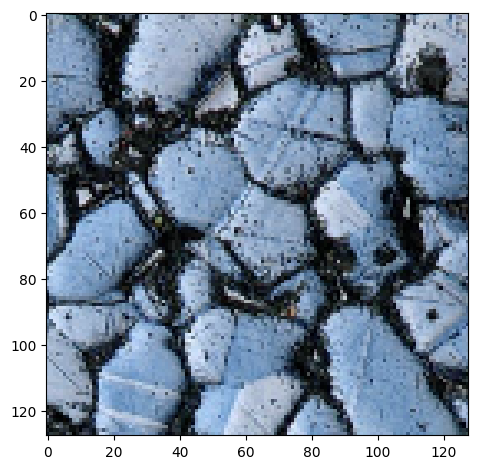

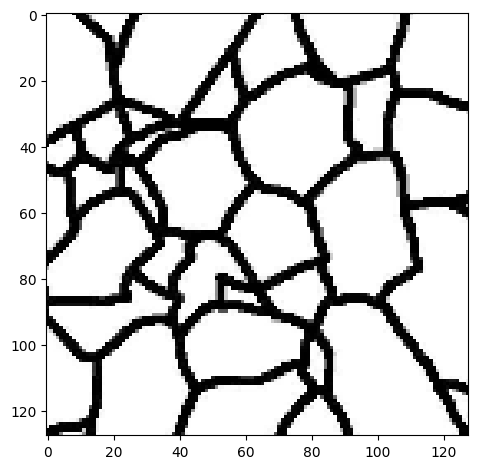

In [12]:
# example
image_x = random.randint(0, IMG_COUNT)
image_x
imshow(images[image_x])
plt.show()
imshow(masks[image_x])
plt.show()

# Unet Attention Architecture
Unet(in_channels, out_channels)

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_prob=0.1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_prob)
        )

    def forward(self, x):
        return self.conv(x)

class AttentionGate(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super(AttentionGate, self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, 1, bias=False),
            nn.BatchNorm2d(F_int)
        )
        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, 1, bias=False),
            nn.BatchNorm2d(F_int)
        )
        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, 1, bias=False),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )
        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        return x * self.psi(psi)

class UNetWithAdvancedAttention(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetWithAdvancedAttention, self).__init__()
        self.enc1 = ConvBlock(in_channels, 16)
        self.enc2 = ConvBlock(16, 32)
        self.enc3 = ConvBlock(32, 64)
        self.enc4 = ConvBlock(64, 128)
        self.center = ConvBlock(128, 256)
        self.att1 = AttentionGate(128, 128, 64)
        self.att2 = AttentionGate(64, 64, 32)
        self.att3 = AttentionGate(32, 32, 16)
        self.att4 = AttentionGate(16, 16, 8)
        self.upconv4 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec4 = ConvBlock(256, 128)
        self.upconv3 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec3 = ConvBlock(128, 64)
        self.upconv2 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.dec2 = ConvBlock(64, 32)
        self.upconv1 = nn.ConvTranspose2d(32, 16, 2, stride=2)
        self.dec1 = ConvBlock(32, 16)
        self.outc = nn.Conv2d(16, out_channels, 1)

    def forward(self, x):
        # Encoder path
        x1 = self.enc1(x)
        p1 = F.max_pool2d(x1, 2)
        x2 = self.enc2(p1)
        p2 = F.max_pool2d(x2, 2)
        x3 = self.enc3(p2)
        p3 = F.max_pool2d(x3, 2)
        x4 = self.enc4(p3)
        p4 = F.max_pool2d(x4, 2)
        center = self.center(p4)

        # Decoder path with attention gates
        u4 = self.upconv4(center)
        x4 = self.att1(u4, x4)
        u4 = torch.cat([u4, x4], dim=1)
        d4 = self.dec4(u4)
        u3 = self.upconv3(d4)
        x3 = self.att2(u3, x3)
        u3 = torch.cat([u3, x3], dim=1)
        d3 = self.dec3(u3)
        u2 = self.upconv2(d3)
        x2 = self.att3(u2, x2)
        u2 = torch.cat([u2, x2], dim=1)
        d2 = self.dec2(u2)
        u1 = self.upconv1(d2)
        x1 = self.att4(u1, x1)
        u1 = torch.cat([u1, x1], dim=1)
        d1 = self.dec1(u1)

        out = self.outc(d1)
        return torch.sigmoid(out)

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetWithAdvancedAttention(3, 1).to(device)

# Model summary
from torchsummary import summary
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             448
       BatchNorm2d-2         [-1, 16, 128, 128]              32
              ReLU-3         [-1, 16, 128, 128]               0
            Conv2d-4         [-1, 16, 128, 128]           2,320
       BatchNorm2d-5         [-1, 16, 128, 128]              32
              ReLU-6         [-1, 16, 128, 128]               0
           Dropout-7         [-1, 16, 128, 128]               0
         ConvBlock-8         [-1, 16, 128, 128]               0
            Conv2d-9           [-1, 32, 64, 64]           4,640
      BatchNorm2d-10           [-1, 32, 64, 64]              64
             ReLU-11           [-1, 32, 64, 64]               0
           Conv2d-12           [-1, 32, 64, 64]           9,248
      BatchNorm2d-13           [-1, 32, 64, 64]              64
             ReLU-14           [-1, 32,

In [14]:
from torchsummary import summary
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             448
       BatchNorm2d-2         [-1, 16, 128, 128]              32
              ReLU-3         [-1, 16, 128, 128]               0
            Conv2d-4         [-1, 16, 128, 128]           2,320
       BatchNorm2d-5         [-1, 16, 128, 128]              32
              ReLU-6         [-1, 16, 128, 128]               0
           Dropout-7         [-1, 16, 128, 128]               0
         ConvBlock-8         [-1, 16, 128, 128]               0
            Conv2d-9           [-1, 32, 64, 64]           4,640
      BatchNorm2d-10           [-1, 32, 64, 64]              64
             ReLU-11           [-1, 32, 64, 64]               0
           Conv2d-12           [-1, 32, 64, 64]           9,248
      BatchNorm2d-13           [-1, 32, 64, 64]              64
             ReLU-14           [-1, 32,

# dataset splitting

In [15]:
# create the X and Y (input and output)

X_train = np.array(images)
Y_train = np.array(masks)
print(X_train.shape, Y_train.shape)
# change the Y to a boolean
Y_train = np.where(Y_train > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [16]:
# careful to run this cell only once (otherwise shape changes)
X_train = np.transpose(X_train, (0, 3, 1 , 2))
Y_train = np.transpose(Y_train, (0, 3, 1 , 2))
print(X_train.shape, Y_train.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [17]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_train, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(IMG_COUNT, 1, 128, 128)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


In [18]:
# prompt: Make Dataset from data

from torch.utils.data import Dataset

class GrainDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx]).float()
        mask = torch.from_numpy(self.masks[idx]).float()
        return image, mask

# Create the dataset
dataset = GrainDataset(X_train, Y_t)



In [19]:
# prompt: create train and validation dataset

from torch.utils.data import random_split

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])



In [21]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

# Define DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define callbacks
class ModelCheckpoint:
    def __init__(self, checkpoint_path):
        self.checkpoint_path = checkpoint_path
        self.best_loss = float('inf')

    def __call__(self, model, epoch, train_loss, val_loss):
        if val_loss < self.best_loss:
            torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'train_loss' : train_loss,
            'val_loss': val_loss,
            }, self.checkpoint_path)
            print("Checkpoint saved")
            self.best_loss = val_loss

from datetime import datetime
checkpoint_path = f'/content/drive/MyDrive/465 Project/Unet Checkpoints/TrainingSetAtt{TRAINING_SET}_{datetime.now().strftime("%d%m%Y %H:%M:%S")}.pt'
# print(checkpoint_path)
# os.makedirs("/content/drive/MyDrive/465 Project", exist_ok=True) # already exists
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpointer = ModelCheckpoint(checkpoint_path)

# Assuming 'model' is already transferred to the appropriate device
# and 'device' is defined as 'cuda' if available, otherwise 'cpu'
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    for inputs, targets in train_loader:
        # Move inputs and targets to the same device as the model
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()  # Clear the gradients
        outputs = model(inputs)  # Forward pass: compute the model output
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Aggregate the loss

    # After training batches, compute the average loss
    train_loss /= len(train_loader.dataset)

    # Evaluate the model if necessary, make sure to move evaluation data to the same device
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation
        val_loss = 0.0
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Call the ModelCheckpoint callback
    # checkpointer(model,epoch, train_loss, val_loss)


Epoch [1/20], Train Loss: 0.5473, Val Loss: 0.5373
Epoch [2/20], Train Loss: 0.4694, Val Loss: 0.4294
Epoch [3/20], Train Loss: 0.4344, Val Loss: 0.4229
Epoch [4/20], Train Loss: 0.4120, Val Loss: 0.3954
Epoch [5/20], Train Loss: 0.3918, Val Loss: 0.3849
Epoch [6/20], Train Loss: 0.3768, Val Loss: 0.3753
Epoch [7/20], Train Loss: 0.3652, Val Loss: 0.3634
Epoch [8/20], Train Loss: 0.3559, Val Loss: 0.3568
Epoch [9/20], Train Loss: 0.3484, Val Loss: 0.3552
Epoch [10/20], Train Loss: 0.3414, Val Loss: 0.3514
Epoch [11/20], Train Loss: 0.3358, Val Loss: 0.3529
Epoch [12/20], Train Loss: 0.3288, Val Loss: 0.3515
Epoch [13/20], Train Loss: 0.3271, Val Loss: 0.3500
Epoch [14/20], Train Loss: 0.3160, Val Loss: 0.3575
Epoch [15/20], Train Loss: 0.3074, Val Loss: 0.3534
Epoch [16/20], Train Loss: 0.3022, Val Loss: 0.3527
Epoch [17/20], Train Loss: 0.2925, Val Loss: 0.3588
Epoch [18/20], Train Loss: 0.2841, Val Loss: 0.3683
Epoch [19/20], Train Loss: 0.2743, Val Loss: 0.3678
Epoch [20/20], Train 

In [23]:
#current_checkpoint = torch.load(checkpoint_path)
#model.load_state_dict(current_checkpoint['model_state_dict'])
#model.eval()
#print(current_checkpoint['train_loss'],current_checkpoint['val_loss'])

In [24]:
def display_results(image, ground_truth_mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display input image
    axes[0].imshow(np.transpose(image, (1, 2, 0)))
    axes[0].set_title('Input Image')

    # Display ground truth mask
    axes[1].imshow(np.squeeze(ground_truth_mask))
    axes[1].set_title('Ground Truth Mask')

    # Display predicted mask
    axes[2].imshow(np.squeeze(predicted_mask))
    axes[2].set_title('Predicted Mask')

    plt.show()

In [25]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [31]:
# from torchmetrics.functional import dice
# from torchmetrics.functional import jaccard_index

# total_jaccard_score = 0.0
# total_dice_score = 0.0
# total_num_samples = 0

# for images, masks in val_loader:
#     batch_size = images.size(0)  # Get the actual batch size
#     total_num_samples += batch_size

#     with torch.no_grad():
#         images = images.to(device)
#         masks = masks.to(device)

#         # Forward pass
#         preds = model(images)

#         for ind in range(len(preds)):
#             pred_tensor = (preds[ind] > 0.5).float()
#             gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

#             dice_score = dice(pred_tensor, gt_tensor)
#             total_dice_score += dice_score.item()

#             jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
#             total_jaccard_score += jaccard_score.item()

# average_dice_score = total_dice_score / total_num_samples
# average_jaccard_score = total_jaccard_score / total_num_samples


# print(f"Total Number samples: {total_num_samples}")
# print(f"Average Dice Score: {average_dice_score}")
# print(f"Average Jaccard Index: {average_jaccard_score}")

In [26]:
# using the while RG dataset as validation dataset to calculate dice score
rg_image_dir = '/content/data/GRAIN DATA SET/RG'
rg_mask_dir = '/content/data/GRAIN DATA SET/RGMask'

images = []
masks = []

# Iterate through the directories and load the images and masks
for file in sorted(os.listdir(rg_image_dir)):
    # Load the image and resize to the target size
    img = cv2.imread(os.path.join(rg_image_dir, file))
    img = cv2.resize(img, target_size)

    # Append the resized image to the list of images
    images.append(img)

for file in sorted(os.listdir(rg_mask_dir)):

    # Load the corresponding mask and resize to the target size
    mask = cv2.imread(os.path.join(rg_mask_dir, file))
    mask = cv2.resize(mask, target_size)

    # Append the resized mask to the list of masks
    masks.append(mask)


In [27]:
# create the X and Y (input and output)

X_rg = np.array(images)
Y_rg = np.array(masks)
print(X_rg.shape, Y_rg.shape)
# change the Y to a boolean
Y_rg = np.where(Y_rg > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [28]:
# careful to run this cell only once (otherwise shape changes)
X_rg = np.transpose(X_rg, (0, 3, 1 , 2))
Y_rg = np.transpose(Y_rg, (0, 3, 1 , 2))
print(X_rg.shape, Y_rg.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [29]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_rg, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(480, 1, 128, 128)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


# Results

In [30]:
dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(dataset,batch_size=16, shuffle=False)

from torchmetrics.functional import dice
from torchmetrics.functional import jaccard_index

total_jaccard_score = 0.0
total_dice_score = 0.0
total_num_samples = 0

for images, masks in rg_val_loader:
    batch_size = images.size(0)  # Get the actual batch size
    total_num_samples += batch_size

    with torch.no_grad():
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        preds = model(images)

        for ind in range(len(preds)):
            pred_tensor = (preds[ind] > 0.5).float()
            gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

            dice_score = dice(pred_tensor, gt_tensor)
            total_dice_score += dice_score.item()

            jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
            total_jaccard_score += jaccard_score.item()

average_dice_score = total_dice_score / total_num_samples
average_jaccard_score = total_jaccard_score / total_num_samples

print(f"Training set: {TRAINING_SET}")
print(f"Total Number samples: {total_num_samples}")
print(f"Average Dice Score: {average_dice_score}")
print(f"Average Jaccard Index: {average_jaccard_score}")

Training set: 6
Total Number samples: 480
Average Dice Score: 0.9150238655507564
Average Jaccard Index: 0.8438944052904844
